In [0]:
from google.colab import files
upladed = files.upload()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/train.csv')
dfReserve = df.copy()


## EDA : Exploratory data analysis

In [0]:
df.head()

,age,gender,ethnicity,weight,height,visits
0,50.0,male,group A,227.0,NaN,15
1,58.0,female,group C,233.0,73.0,12
2,50.0,male,group D,268.0,72.0,11
3,35.0,male,group C,263.0,71.0,9
4,56.0,female,group E,112.0,67.0,17


In [0]:
df.shape

(1000, 6)

In [0]:
df.columns


Index(['age', 'gender', 'ethnicity', 'weight', 'height', 'visits'], dtype='object')

In [0]:
df.describe()

,age,weight,height,visits
count,971.000000,981.000000,980.000000,1000.000000
mean,44.618950,203.237513,67.453061,11.398000
std,14.662703,51.721050,6.679045,3.879516
min,0.000000,48.000000,46.000000,3.000000
25%,35.000000,169.000000,63.000000,9.000000
50%,44.000000,205.000000,68.000000,11.000000
75%,54.500000,237.000000,72.000000,14.000000
max,89.000000,369.000000,86.000000,30.000000


- missing values in age, weight and height
- id does not matter, to be dropped
- age: important std , possible outliers
- weight: kinda important std, something wrong i feel it
- height: ok, a fine distribution

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        971 non-null    float64
 1   gender     1000 non-null   object 
 2   ethnicity  1000 non-null   object 
 3   weight     981 non-null    float64
 4   height     980 non-null    float64
 5   visits     1000 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 47.0+ KB


In [0]:
df.dtypes

age          float64
gender        object
ethnicity     object
weight       float64
height       float64
visits         int64
dtype: object

In [0]:
df.isnull().sum()

age          29
gender        0
ethnicity     0
weight       19
height       20
visits        0
dtype: int64

#### Dividing the data into categorical and numerical 

In [0]:
def extractNumerical(data):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return data.select_dtypes(include=numerics).columns

num = extractNumerical(df)

num.head()

AttributeError: ignored

In [0]:
#I know this function does not extract ordinal data types
#Working on that
#Seeing the dataframe, I assume most numerical varibales are purely numerical 
#and do not include ordinal ( a type of catgeorical data)

def extractCategorical(data):
    categorical = ['object']
    return data.select_dtypes(include=categorical).columns

cat = extractCategorical(df)
cat

,gender,ethnicity
0,male,group A
1,female,group C
2,male,group D
3,male,group C
4,female,group E
...,...,...
995,female,group C
996,female,group D
997,male,group A
998,male,group C


In [0]:
# #vbadddou
# categorical_feature_mask = df.dtypes==object
# categorical_features = df.columns[categorical_feature_mask].tolist()
# numeric_feature_mask = df.dtypes!=object
# numeric_features = df.columns[numeric_feature_mask].tolist()

### Categorical Data

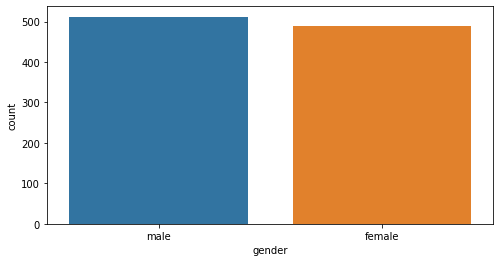

In [0]:
#Plotting 'gender' using seaborn function 'countplot' with countplot function
plt.figure(figsize=(8, 4))
sns.countplot(data = df , x = 'gender')

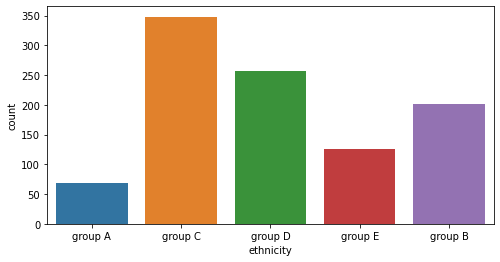

In [0]:
#Plotting 'ethnicity' 
plt.figure(figsize=(8, 4))
sns.countplot(data = df , x = 'ethnicity')

- Group C has the most nb of samples. Group B and group D then. 

In [0]:
for label in df.ethnicity.unique():
  print(label)

group A
group C
group D
group E
group B


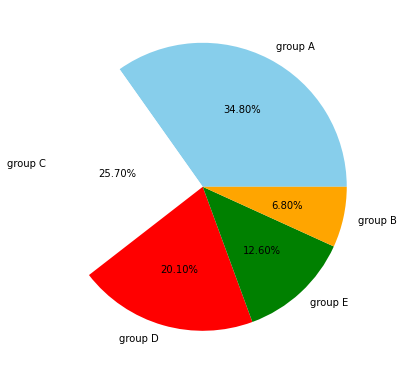

In [0]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Leg = df.ethnicity.value_counts() 
labels = [label for label in df.ethnicity.unique()]
ax.pie(Leg, labels = labels,autopct='%1.2f%%',colors=['skyblue','white','red','green','orange'])
plt.show()

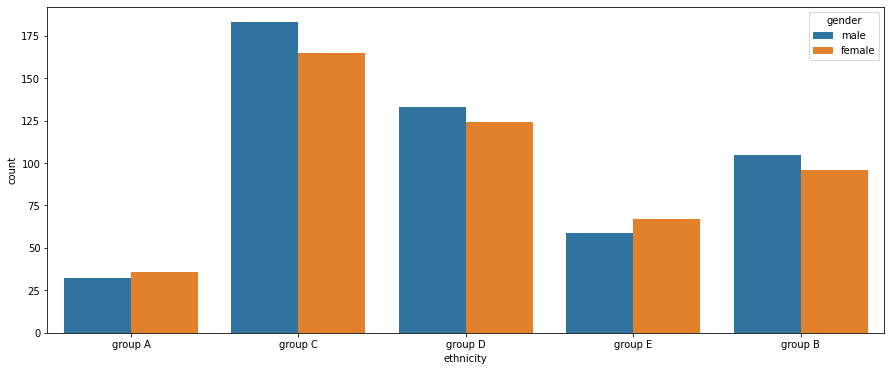

In [0]:
plt.figure(figsize=(15, 6))
sns.countplot(data = df , x = 'ethnicity', hue='gender')

- For group E and group A interrogated males nb is lower than the female one. It is not of a big difference though



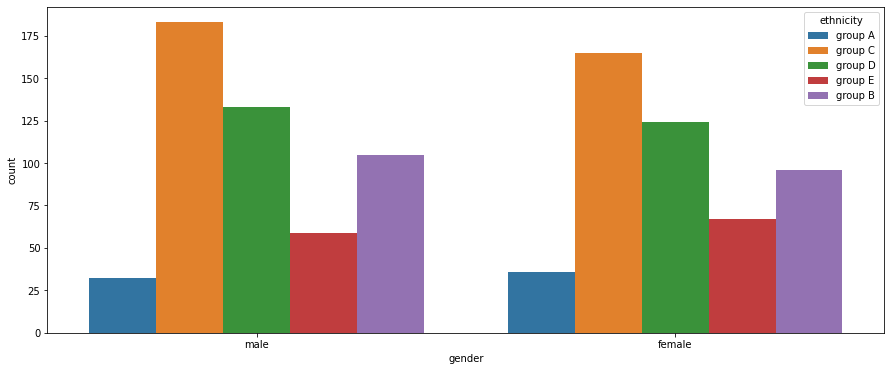

In [0]:
plt.figure(figsize=(15, 6))
sns.countplot(data = df , x = 'gender', hue='ethnicity')

- By gender, the overall distribution between categories is almost identical. 
- So maybe the gender does not really matter? 

### Numerical Data

In [0]:
num.head()

,age,weight,height,visits
0,50.0,227.0,NaN,15
1,58.0,233.0,73.0,12
2,50.0,268.0,72.0,11
3,35.0,263.0,71.0,9
4,56.0,112.0,67.0,17


##### mono analysis

- Visits: High skweness , must be dealt with

NameError: ignored

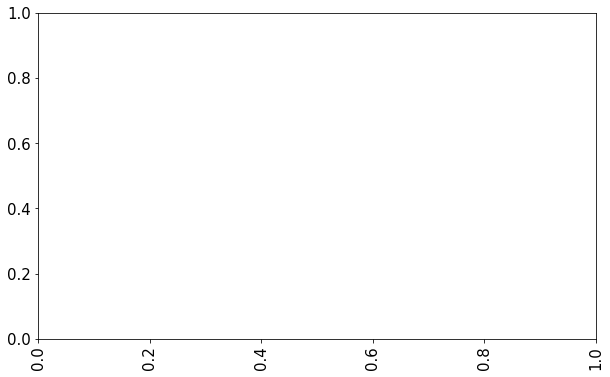

In [0]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
sns.distplot(num['visits'], hist=False, kde=True,  color = '#12C803',
             kde_kws={'linewidth': 3,'shade': True,})

print("skw:\n",num['visits'].skew())

skw:
 -0.0014326416799576693


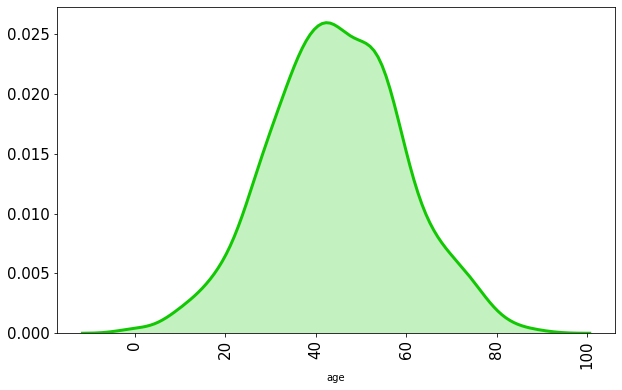

In [0]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
sns.distplot(num['age'], hist=False, kde=True,  color = '#12C803',
             kde_kws={'linewidth': 3,'shade': True,})
print("skw:\n",num['age'].skew())

skw:
 -0.052830660268982484


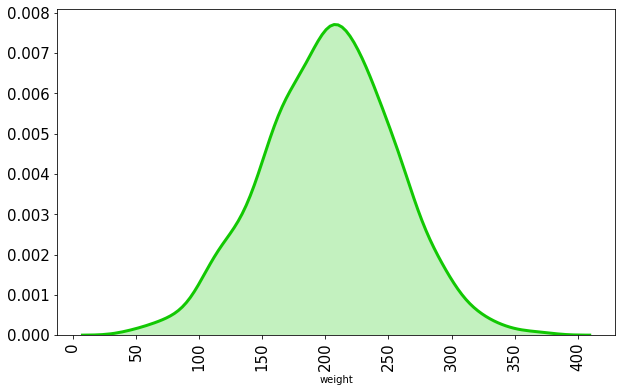

In [0]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
sns.distplot(num['weight'], hist=False, kde=True,  color = '#12C803',
             kde_kws={'linewidth': 3,'shade': True,})

print("skw:\n",num['weight'].skew())

skw:
 -0.026185547811308097


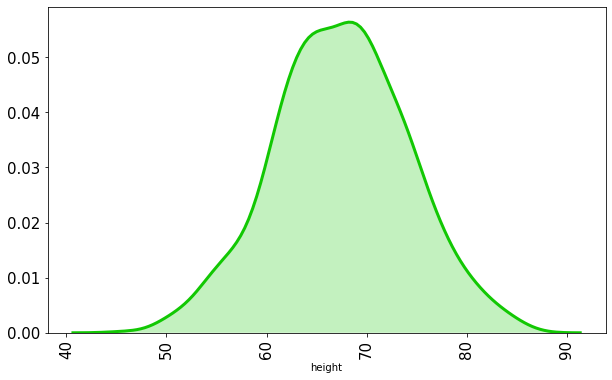

In [0]:
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
sns.distplot(num['height'], hist=False, kde=True,  color = '#12C803',
             kde_kws={'linewidth': 3,'shade': True,})

print("skw:\n",num['height'].skew())

##### bivariant analysis

- There is no linear correlation between weight and height

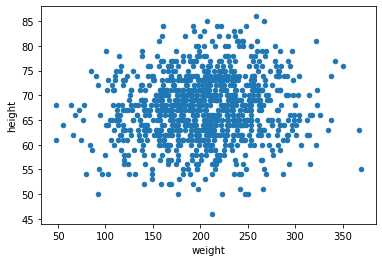

In [0]:
num.plot(kind="scatter", x="weight", y="height")


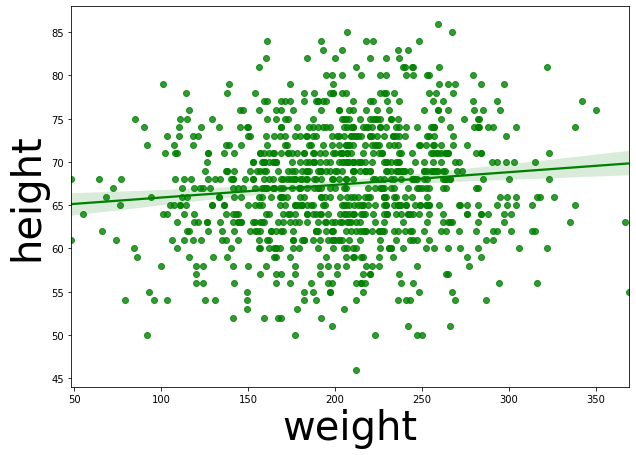

In [0]:
plt.figure(figsize=(10, 7))
plt.xlabel('weight',fontsize=40)
plt.ylabel('height',fontsize=40)
sns.regplot(data = num , x="weight", y="height",color = 'green')

- As I suspected, there is a relationship between age and visits

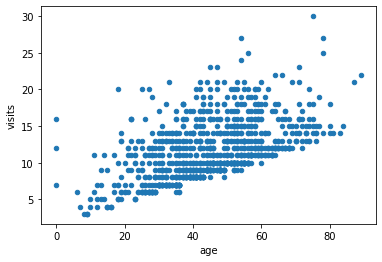

In [0]:
num.plot(kind="scatter", x="age", y="visits")

- Now let’s look at the visits. The radius of each circle represents
the age (option s), and the color represents the number of visits (option c). 

- We will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

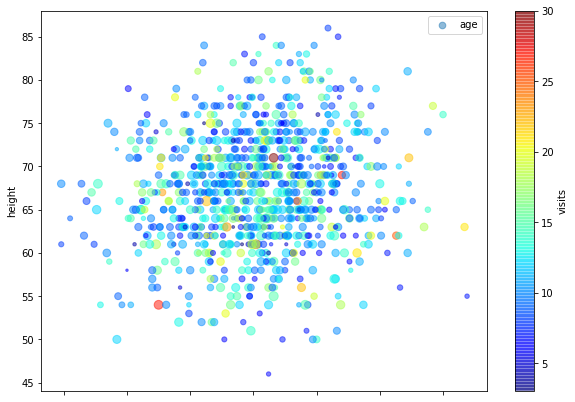

In [0]:
num.plot(kind="scatter", x="weight", y="height", alpha=0.5,
 s=num["age"], label="age", figsize=(10,7),
 c="visits", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


- Trying the same method of visualization while changing the parameters

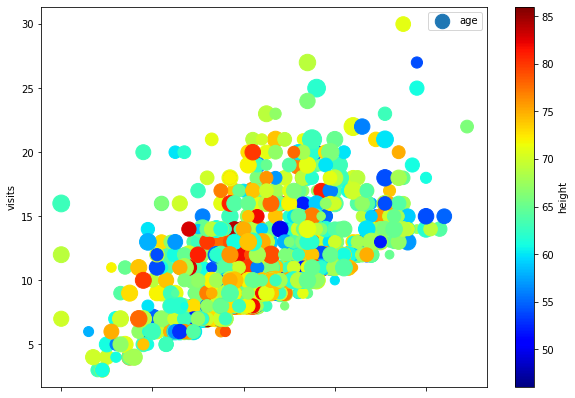

In [0]:
num.plot(kind="scatter", x="age", y="visits", alpha=1,
 s=num["weight"], label="age", figsize=(10,7),
 c="height", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfb3251780>,
      dtype=object)

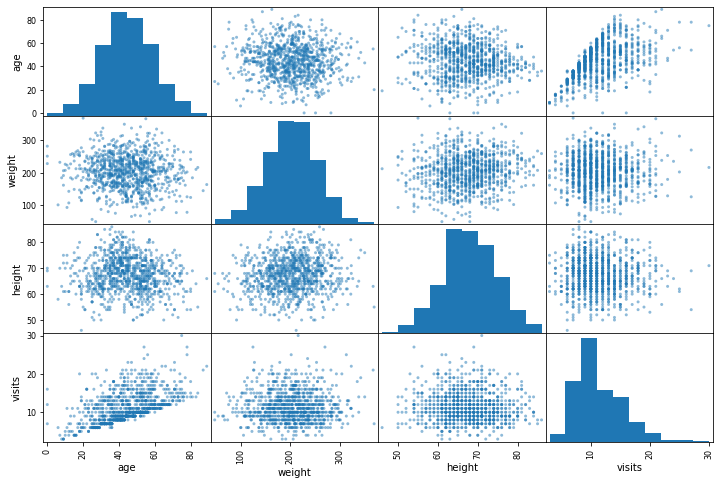

In [0]:
from pandas.plotting import scatter_matrix
attributes = num.columns
scatter_matrix(num[attributes], figsize=(12, 8))

- Correlation 

In [0]:
corr = num.corr()
corr

,age,weight,height,visits
age,1.000000,-0.059835,-0.076317,0.525716
weight,-0.059835,1.000000,0.114282,0.011391
height,-0.076317,0.114282,1.000000,-0.046333
visits,0.525716,0.011391,-0.046333,1.000000


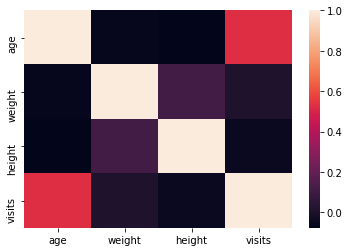

In [0]:
import seaborn as sns

corr = num.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

- The most promising attribute to predict the number of visits  is the age variable, so let’s zoom in on their correlation scatterplot 

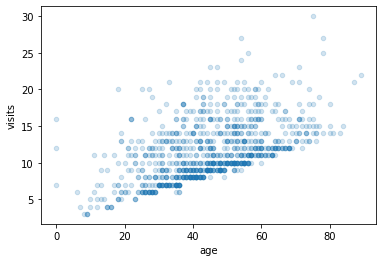

In [0]:
num.plot(kind="scatter", x="age", y="visits",
 alpha=0.2)
#alpha helps us detect the area with more density of individuals in our plot

- checking for outliers using boxplot

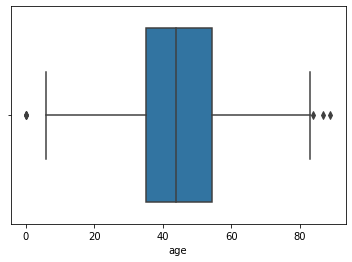

In [0]:
sns.boxplot(x=num['age'])

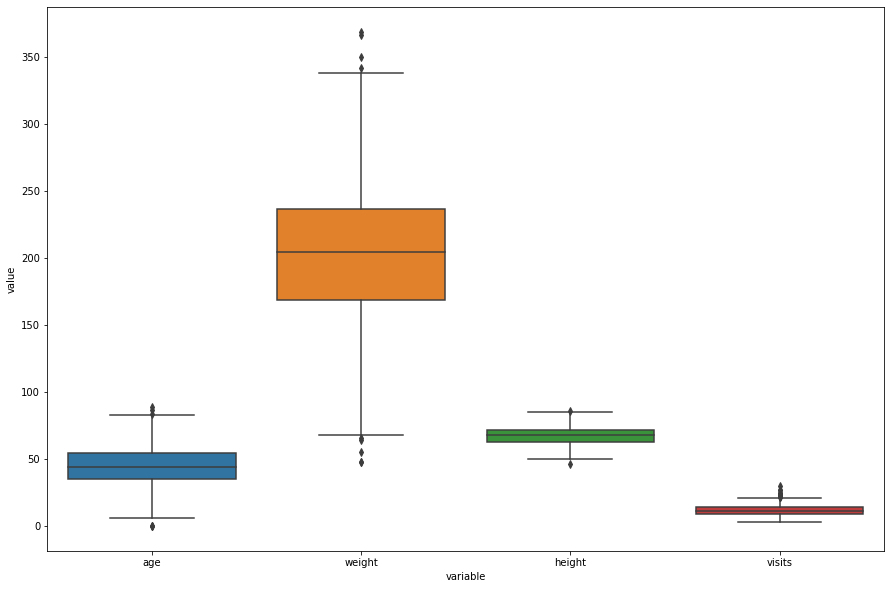

In [0]:
plt.figure(figsize=(15, 10))
sns.boxplot(data = pd.melt(num),x="variable", y="value")

- We have some outliers we need to deal with later in the preprocessing.
- Moving on to more advanced analysis

#### More Advanced Analysis

In [0]:
X = "gender" # qualitative
Y = "age" # quantitative


#df['gender'].unique()

male = df[df['gender']=='male']
male = male.drop(['gender'],axis=1)
female = df[df['gender']=='female']
female = female.drop(['gender'],axis=1)



In [0]:
from pandas.plotting import scatter_matrix
attributes = male.columns
scatter_matrix(male[attributes], figsize=(12, 8))

In [0]:
from pandas.plotting import scatter_matrix
attributes = dfhot.columns
scatter_matrix(dfhot[attributes], figsize=(12, 8))

## Data Preprocessing

In [0]:
#in case i messed it up i reload the reserved copy of the data, comment/uncomment to use
df = dfReserve
df.head()


,id,age,gender,ethnicity,weight,height,visits
0,1,50.0,male,group A,227.0,NaN,15
1,2,58.0,female,group C,233.0,73.0,12
2,3,50.0,male,group D,268.0,72.0,11
3,4,35.0,male,group C,263.0,71.0,9
4,5,56.0,female,group E,112.0,67.0,17


In [0]:
t1 = df.copy()
# t1['IBM']= t1['weight']/(t1['height']**2)
# #t1['IBM']= t1['IBM']*t1['age']

# old = t1['age']>60
# young = t1['age'] < 20

# t1['old']=t1[old and young]
# t1['young'].head()

# t1['middle'] = t1[(t1.age < 60) & (t1.age >20)]

#### Dealing with Outliers

In [0]:
dfe = t1.copy()

def deal_outliers(data):
  dfe = data.copy().drop(['id'],axis=1)
  min=0
  max=0
  for col in ['weight','height']:
    min = dfe[col].mean() - 3 * dfe[col].std()
    max = dfe[col].mean() + 3 * dfe[col].std()
    dfe = dfe[(dfe[col]>min)] 
  return dfe


dfe = deal_outliers(t1)
dfe.isnull().sum()

#for some reasons this is the most optimized setup

age          25
gender        0
ethnicity     0
weight        0
height        0
visits        0
dtype: int64

#### Dealing with missing values

In [0]:
def deal_nan(data):
  dfnan = data.copy()

  dfnan["age"] = dfnan["age"].fillna(dfnan["age"].mean())
  # dfnan["height"] = dfnan["height"].fillna(dfnan["height"].mean())

  return dfnan


dfnan = deal_nan(dfe)
dfnan.isnull().sum()

age          0
gender       0
ethnicity    0
weight       0
height       0
visits       0
dtype: int64

In [0]:
nan = dfnan[dfnan['height'].isnull()]
not_null = dfnan[dfnan['height']>0]

In [0]:
dfnan1 = dfnan.copy()
from sklearn.linear_model import LinearRegression
op_model = LinearRegression()

op_model.fit(not_null[['weight','age']],not_null['height'])

new = op_model.predict(nan[['weight','age']])
# new_age
dfnan1['height'].isnull().sum()

In [0]:
# second_age =nan_age["age"].fillna(dfe["age"].mean())
# second_age.mean()

In [0]:
dfnan1['height'].loc[dfnan1['height'].isnull()] = new
dfnan1['height'].isnull().sum()

#### Encode categorical data

In [0]:
def encode(data):
  from sklearn.preprocessing import OrdinalEncoder
  from sklearn.preprocessing import OneHotEncoder
  dford = data.copy()
  Oe = OrdinalEncoder()
  dford[['gender']] = Oe.fit_transform(dford[['gender']])
  dfhot = pd.get_dummies(dford.copy(),prefix=['ethnicity'])
  return dfhot

dfhot = encode(dfnan)
dfhot.head()

,age,gender,weight,height,visits,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E
1,58.0,0.0,233.0,73.0,12,0,0,1,0,0
2,50.0,1.0,268.0,72.0,11,0,0,0,1,0
3,35.0,1.0,263.0,71.0,9,0,0,1,0,0
4,56.0,0.0,112.0,67.0,17,0,0,0,0,1
5,45.0,0.0,253.0,69.0,23,0,1,0,0,0


- One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
not the case for the ethnicity and gender columns

### Scaling numerical values


In [0]:
def extractNumerical(data):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return data.select_dtypes(include=numerics)

extractNumerical(dfhot)

,age,gender,weight,height,visits
1,58.0,0.0,233.0,73.0,12
2,50.0,1.0,268.0,72.0,11
3,35.0,1.0,263.0,71.0,9
4,56.0,0.0,112.0,67.0,17
5,45.0,0.0,253.0,69.0,23
...,...,...,...,...,...
994,71.0,1.0,179.0,63.0,23
995,29.0,0.0,191.0,64.0,6
996,41.0,0.0,147.0,67.0,9
997,45.0,1.0,185.0,70.0,17


In [0]:
def scale(data):
  from sklearn.impute import SimpleImputer
  from sklearn.pipeline import Pipeline
  from sklearn.preprocessing import StandardScaler
  pipe = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('std_scaler', StandardScaler()),
  ])

  #num = extractNumerical(data)
  num = data.copy()
  if 'visits' in num.columns:
    num = num.drop(['visits'],axis=1)
  #num = num.drop(['gender'],axis=1)
  scaled = pipe.fit_transform(num)



  scaled = pd.DataFrame(scaled, columns=num.columns)

  df_scaled=data.copy()
  df_scaled.index = scaled.index

  for col in scaled.columns:
      df_scaled[col]=scaled[col]

  return df_scaled

df_scaled = scale(dfhot)
df_scaled.isnull().sum()
df_scaled.iloc[[3]]

,age,gender,weight,height,visits,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E
3,0.783559,-1.018929,-1.7792,-0.064878,17,-0.271708,-0.498372,-0.730443,-0.590182,2.633227


### Feature Engineering

In [0]:

def engineered(data):

  df_eng = data.copy()
  if 'visits' in df_eng.columns:
    df_eng['logVis'] = np.log10(df_eng['visits'])
  df_eng1=df_eng.copy()
  return df_eng1

df_eng = engineered(df_scaled)
df_eng.corr()
df_eng.iloc[[3]]

,age,gender,weight,height,visits,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,logVis
3,0.783559,-1.018929,-1.7792,-0.064878,17,-0.271708,-0.498372,-0.730443,-0.590182,2.633227,1.230449


## Training the model

In [0]:
linear=[]

In [0]:
def data_splitter(data):
  X = data.drop(['logVis', 'visits'
          ], axis = 1)

  y = data['logVis']
  return X,y

X,y= data_splitter(df_eng)
X.shape

(960, 9)

In [0]:
# df1 = deal_outliers(df) 
# df2 = deal_nan(df1)
# df3 = encode(df2)
# df4 = scale(df3)
# df5 = engineered(df4)
# X,y= data_splitter(df5)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 5)

from sklearn.linear_model import LinearRegression
model = LinearRegression()


hist = model.fit(x_train,y_train)
preds = model.predict(x_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error, mean_squared_error

mse = mean_squared_error(y_test,preds)

linear.append(mse)



mse*1000
#best 0.011692179495748787
#np.sqrt(mean_squared_log_error(np.array(y_test),preds))

11.69882775884572

In [0]:
for h in linear:
  print(h*1000)
print('***********')


11.698827758845722
14.836406209743412
12.538850230181772
11.698827758845722
11.698827758845722
11.69882775884572
***********


In [0]:
something = 10**preds
something[:10]
#https://setscholars.net/2019/02/19/how-to-find-optimal-parameters-using-gridsearchcv-in-regression-in-python/

array([ 9.95111721,  9.21041161, 11.34156122, 11.60914861, 10.29579676,
        9.29660054, 11.30728827, 11.41006966, 11.00749905, 10.06574393])

In [0]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

modelTree = RandomForestRegressor().fit(x_train,y_train)
pred = modelTree.predict(x_test)

print(np.sqrt(mean_squared_log_error(np.array(y_test),pred)))
print(mean_squared_error(y_test,pred)*1000)

0.05856902450383636
14.12852868666114


In [0]:
modelboost = XGBRegressor(max_depth=2).fit(x_train,y_train)
pred = modelboost.predict(x_test)
print(np.sqrt(mean_squared_log_error(np.array(y_test),pred)))
print(mean_squared_error(y_test,pred)*1000)

[22:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.05303553336933382
11.68196431761338


## Submitting

In [0]:
test = pd.read_csv('/content/test.csv')
test.describe()
test['age'].median()

44.0

In [0]:
# sub1 = deal_outliers(test) 
sub1 = test.copy().drop(['id'],axis=1)
sub2 = deal_nan(sub1)
sub3 = encode(sub2)
sub4 = scale(sub3)
sub5 = engineered(sub4)
sub5.shape

(399, 9)

In [0]:
submissions = model.predict(sub5)
# submissions = modelboost.predict(sub5)
Preds = 10 ** submissions
Sub = pd.read_csv('/content/sampleSubmission.csv')
Sub.visits = Preds
Sub.describe()
Sub.head()

print(Preds.shape)
print(Sub.shape)

(399,)
(399, 2)


In [0]:
Sub.visits = Sub.visits.apply(round)
Sub.head()
Sub.to_csv('Sub7.csv',index = False)